## 実験概要
RV-SGDにおける次元数について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

- ノイズの種類
    - 正規分布
        - 平均0
        - 分散
            - 2.2

    - 対数正規分布
        - 平均0
        - 分散
            - 1.75

- 次元数
    - 128
    - 256
    - 512
    - 1024

- n
    - 2500

トライアルの回数は100,ただし損失の推移についてはそのうちの一回を使用

## 結果


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
n = 2500
c = 1
noise = "normal"


  0%|          | 0/100 [00:00<?, ?it/s]

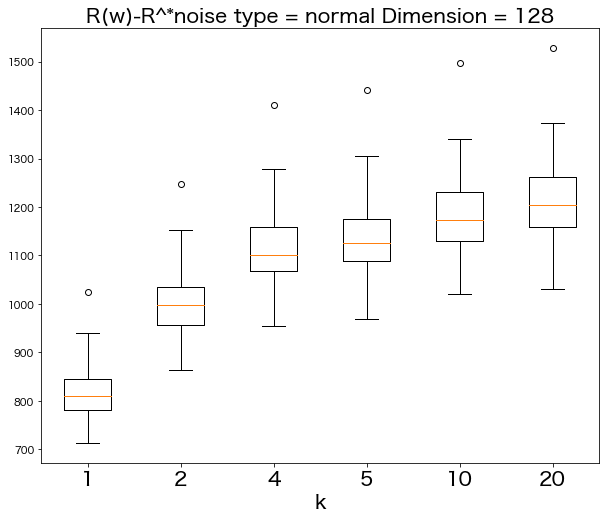

In [3]:
E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,814.306461,998.655223,1107.578936,1131.261732,1180.852950,1206.663675
std,55.032232,66.692741,75.078388,78.719399,78.704884,80.359446
min,712.845376,862.800556,954.429960,967.985941,1020.879398,1031.408925
25%,781.701107,955.594497,1067.285129,1087.610625,1130.616267,1159.224939
50%,809.600085,998.130199,1100.147305,1125.223707,1172.733826,1203.827423
75%,844.948793,1034.379641,1158.890015,1175.889693,1230.240588,1261.588490
max,1025.207129,1247.329473,1411.291949,1442.150259,1497.026732,1528.846865


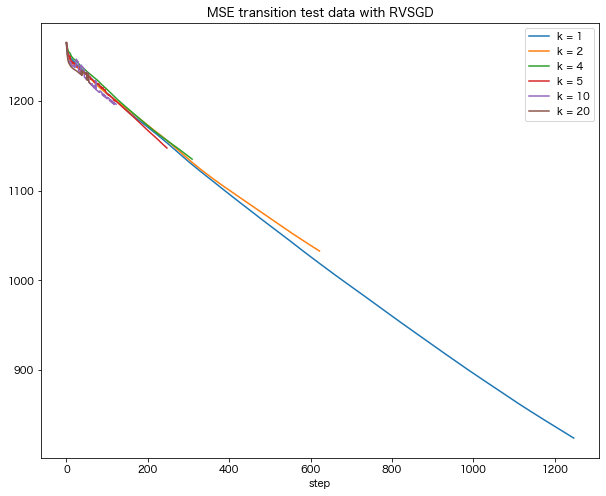

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

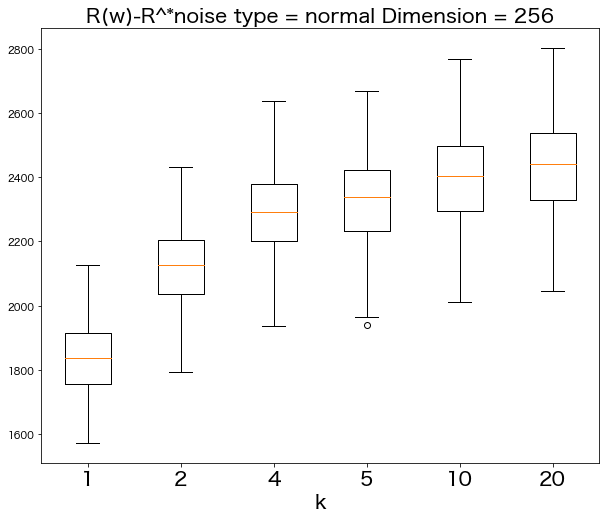

In [6]:

E_var = 1.75

w_star = np.arange(256)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1834.650429,2122.647847,2287.660090,2324.483741,2394.162394,2431.307486
std,112.839192,129.998570,138.678069,142.297245,147.734279,149.136008
min,1572.564675,1795.042561,1936.246421,1939.990602,2012.659018,2044.786440
25%,1756.565258,2035.828508,2201.275283,2232.696451,2296.233419,2329.762741
50%,1837.162894,2127.139420,2291.207762,2338.997139,2405.285072,2439.674723
75%,1915.281124,2204.373652,2379.173599,2421.207815,2497.191379,2536.484823
max,2128.276714,2432.431481,2636.074881,2668.549010,2767.760665,2803.325636


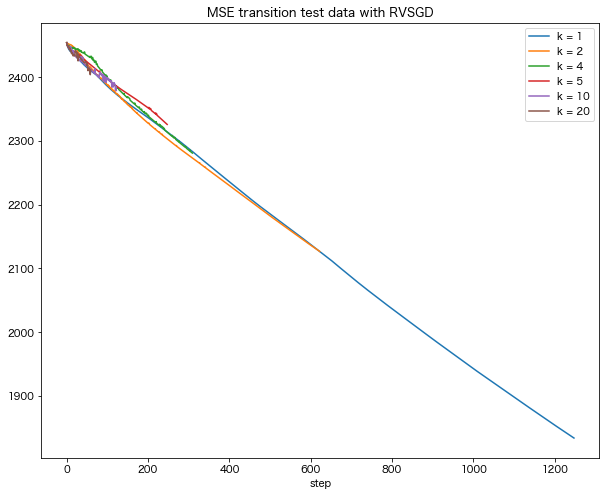

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

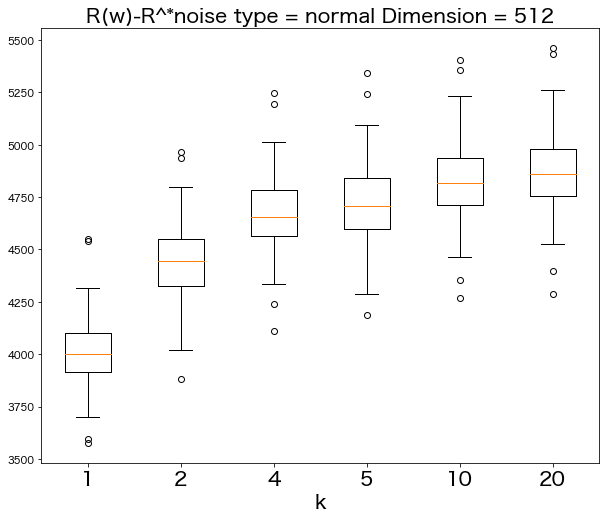

In [9]:

E_var = 1.75

w_star = np.arange(512)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4008.178104,4437.429230,4677.598134,4726.190530,4827.008037,4876.946212
std,162.690612,173.975168,182.958723,183.997217,187.374736,188.750903
min,3575.697952,3882.791130,4109.396708,4188.461408,4269.719732,4286.912927
25%,3914.824236,4324.776349,4564.529344,4599.394879,4710.981428,4756.911606
50%,3998.801160,4445.324577,4655.802244,4707.775230,4817.403296,4860.731747
75%,4099.433743,4547.774569,4782.030223,4840.739652,4936.527866,4981.954108
max,4551.957346,4966.364522,5248.003424,5341.309151,5403.386398,5463.725510


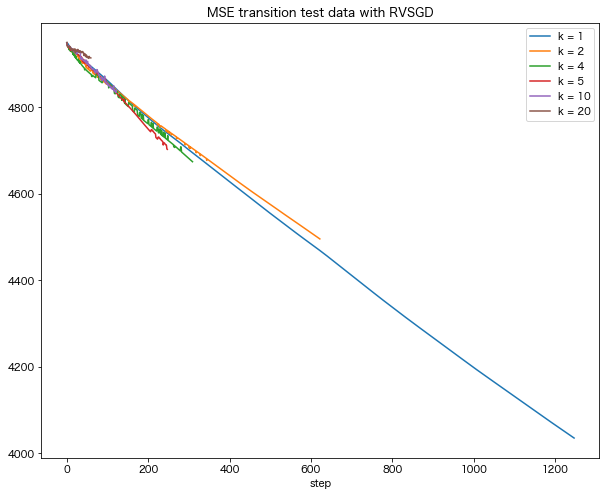

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

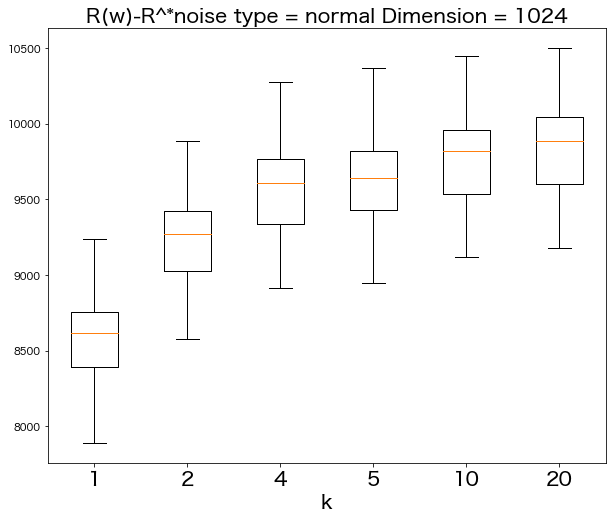

In [12]:

E_var = 1.75

w_star = np.arange(1024)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8564.935858,9220.153468,9560.793676,9621.205036,9769.487861,9836.815690
std,264.224118,274.056432,284.343910,282.854533,289.798058,291.506946
min,7890.281120,8576.635872,8911.828621,8944.310658,9115.946701,9179.582127
25%,8393.072964,9026.841949,9335.998218,9427.214501,9533.446353,9600.393093
50%,8617.439175,9269.690084,9604.987507,9642.502882,9817.943762,9883.482058
75%,8758.365013,9420.684554,9765.790277,9817.343979,9958.388639,10044.212587
max,9235.015457,9885.584763,10277.258636,10368.496017,10447.446236,10501.382549


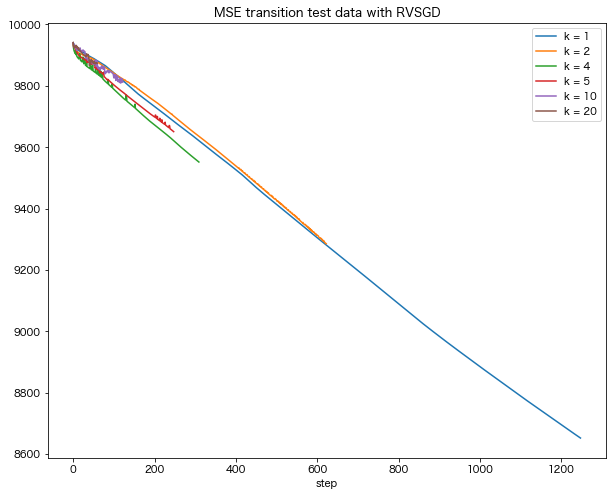

  0%|          | 0/100 [00:00<?, ?it/s]

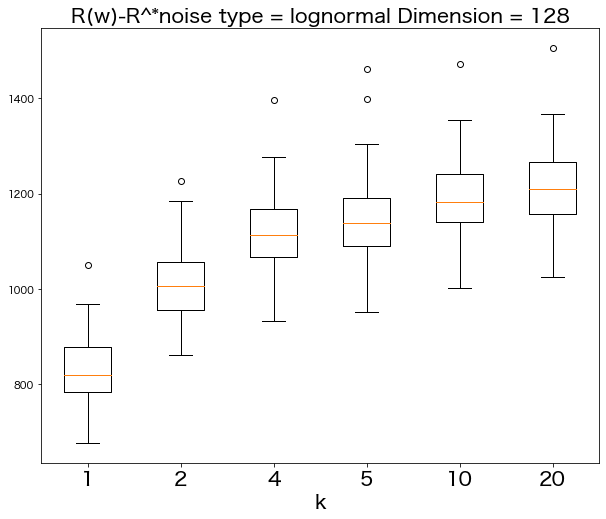

In [14]:
#lognormal noise

noise = "lognormal"
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [15]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,827.364031,1008.296231,1119.483274,1144.194296,1190.371164,1214.768240
std,65.289129,71.500751,79.916452,85.152721,82.932794,85.555142
min,675.752644,860.149770,933.155409,951.359438,1001.443534,1023.894841
25%,783.799324,955.896140,1065.669792,1090.463342,1140.879685,1158.063878
50%,817.861333,1006.034419,1113.106877,1138.618342,1181.688587,1208.700586
75%,878.233829,1055.505422,1167.235340,1190.137324,1240.340082,1265.352327
max,1049.950086,1226.969661,1396.946715,1460.877658,1471.606042,1506.582776


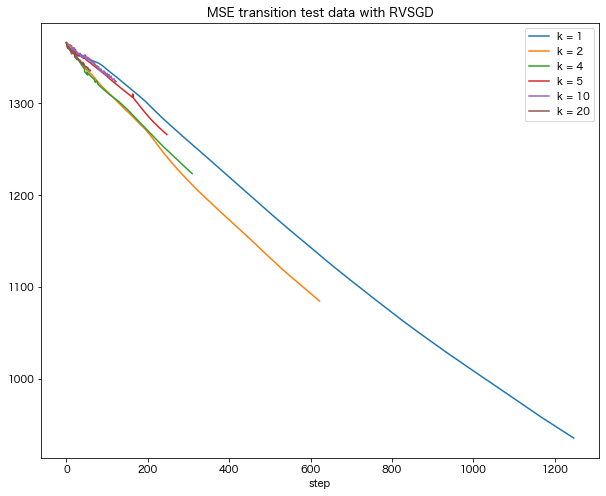

In [16]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

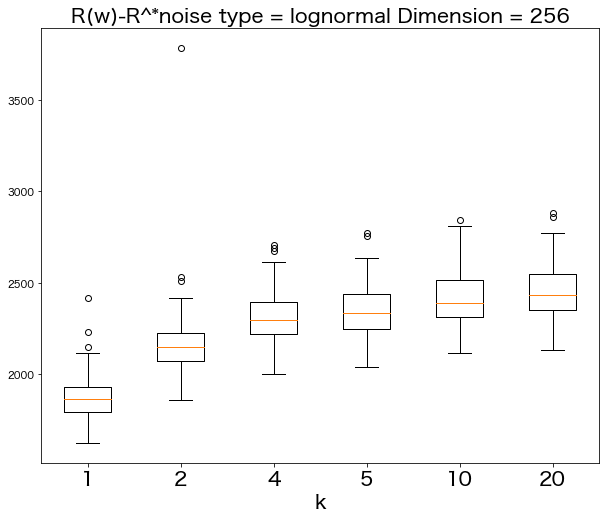

In [17]:

E_var = 1.75

w_star = np.arange(256)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [18]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1869.144278,2162.191671,2306.188630,2342.547948,2410.464945,2446.009610
std,121.560012,206.801138,138.765627,140.506579,140.927454,142.682422
min,1623.615796,1857.970074,2001.846105,2041.021661,2118.113746,2134.674066
25%,1794.091983,2070.317247,2217.943290,2246.362363,2313.007951,2349.596368
50%,1864.816675,2146.763841,2295.276239,2335.413239,2391.299857,2435.042685
75%,1931.108278,2224.344760,2393.723267,2437.049399,2513.250815,2550.584501
max,2416.465976,3786.904341,2705.549324,2772.713802,2845.299003,2881.487745


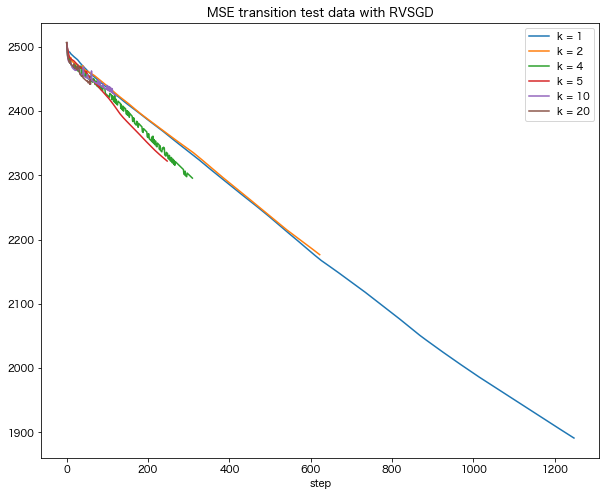

In [19]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

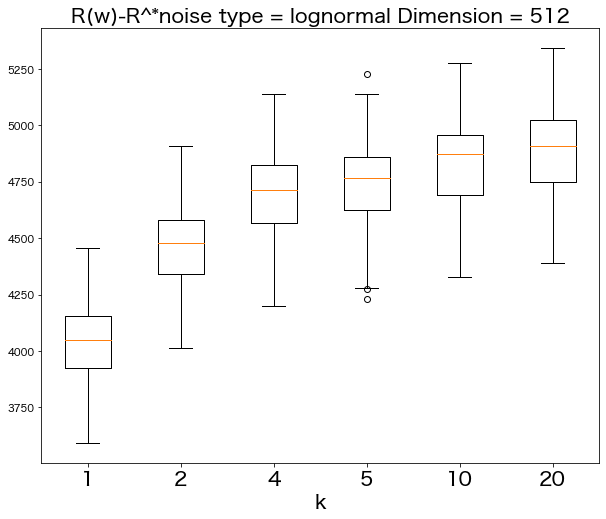

In [20]:

E_var = 1.75

w_star = np.arange(512)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [21]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4040.309269,4471.987165,4696.648218,4744.829042,4840.103800,4893.304097
std,170.948205,178.774793,187.082111,191.203126,189.731673,193.590223
min,3592.469498,4012.259424,4198.899914,4231.079217,4329.510072,4391.397214
25%,3925.196708,4339.312080,4565.558203,4624.491545,4692.750746,4746.441847
50%,4046.878038,4479.448577,4714.855570,4764.131386,4871.111275,4909.640567
75%,4157.230945,4580.536985,4821.717108,4857.212399,4955.311002,5024.872850
max,4456.550872,4910.091204,5138.104740,5224.725303,5276.461447,5343.419490


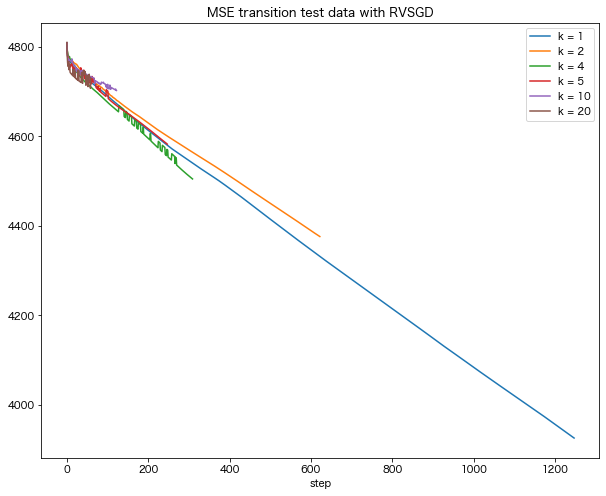

In [22]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

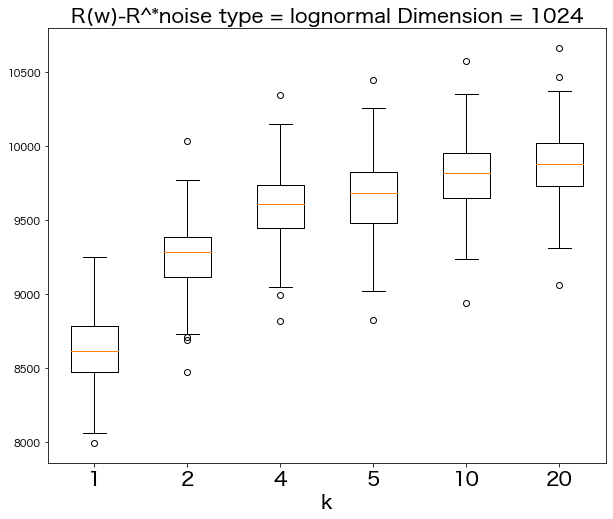

In [23]:

E_var = 1.75

w_star = np.arange(1024)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [24]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8631.508491,9254.615883,9589.628651,9660.518648,9794.646762,9866.631873
std,246.783420,260.512466,264.933316,267.583263,263.762850,265.918819
min,7991.746437,8469.463013,8820.059269,8826.324875,8942.212620,9062.210129
25%,8472.192438,9115.858212,9448.876101,9481.519567,9649.879782,9727.809864
50%,8611.245935,9285.963732,9606.262999,9681.213261,9815.834206,9877.479500
75%,8783.988718,9384.126636,9740.028904,9823.875104,9950.426421,10022.786444
max,9249.274574,10036.007236,10347.837833,10448.721218,10578.929207,10665.956001


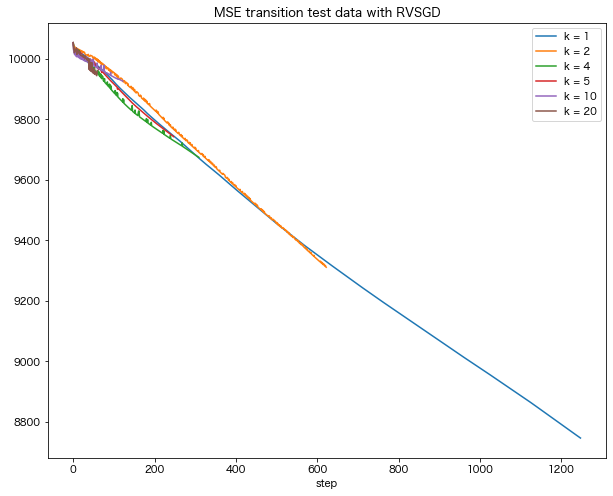

In [25]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)